# Autism Screening on Adults

## I. Standard Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
raw_df = pd.read_csv("data/autism_screening.csv")
raw_df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


## II. Feature Engineering and EDA

Here's the Game Plan:

Binary Features:
Rename, Encode with Bits
* ```gender``` -> ```sex```
* ```jundice``` -> ```jaundice```
* ```austim``` ->  ```asd_family```
* ```used_app_before```
* ```Class/ASD``` -> ```status```

Nominal Features:
Aggregate, Examine, Stupify, Investigate Dimensionality Reduction
* ```ethnicity```
* ```contry_of_res```
* ```relation```

Trivial Features:
* Drop ```age_desc```

We can find data descriptions [here](https://www.kaggle.com/competitions/autismdiagnosis/data).

In [3]:
num_cols = raw_df.select_dtypes(exclude="object").columns.tolist()

clean_df = pd.DataFrame()
clean_df[num_cols] = raw_df[num_cols]

### A. Binary Features

In [4]:
raw_df[["gender", "jundice", "austim", "used_app_before", "Class/ASD"]].head()

,gender,jundice,austim,used_app_before,Class/ASD
0,f,no,no,no,NO
1,m,no,yes,no,NO
2,m,yes,yes,no,YES
3,f,no,yes,no,NO
4,f,no,no,no,NO


In [5]:
sex_coder = {"m": 1, "f": 0}
ans_coder = {"yes": 1, "no": 0}

clean_df["sex"] = raw_df["gender"].map(sex_coder)
clean_df["jaundice"] = raw_df["jundice"].map(ans_coder)
clean_df["asd_family"] = raw_df["austim"].map(ans_coder)
clean_df["used_app_before"] = raw_df["used_app_before"].map(ans_coder)
clean_df["status"] = raw_df["Class/ASD"].str.lower().map(ans_coder)

clean_df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,sex,jaundice,asd_family,used_app_before,status
0,1,1,1,1,0,0,1,1,0,0,26.0,6.0,0,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,5.0,1,0,1,0,0
2,1,1,0,1,1,0,1,1,1,1,27.0,8.0,1,1,1,0,1
3,1,1,0,1,0,0,1,1,0,1,35.0,6.0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,40.0,2.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,7.0,0,0,0,0,1
700,1,0,0,0,0,0,0,1,0,1,34.0,3.0,1,0,0,0,0
701,1,0,1,1,1,0,1,1,0,1,24.0,7.0,0,0,0,0,1
702,1,0,0,1,1,0,1,0,1,1,35.0,6.0,1,0,0,0,0


### B. Nominal Features

In [6]:
raw_df[["ethnicity", "contry_of_res", "relation"]].head(10)

,ethnicity,contry_of_res,relation
0,White-European,United States,Self
1,Latino,Brazil,Self
2,Latino,Spain,Parent
3,White-European,United States,Self
4,?,Egypt,?
5,Others,United States,Self
6,Black,United States,Self
7,White-European,New Zealand,Parent
8,White-European,United States,Self
9,Asian,Bahamas,Health care professional


In [7]:
raw_df[(raw_df["ethnicity"]=="?") | (raw_df["relation"]=="?")][["ethnicity", "contry_of_res", "relation"]]

,ethnicity,contry_of_res,relation
4,?,Egypt,?
12,?,Bahamas,?
13,?,Austria,?
14,?,Argentina,?
19,?,United Arab Emirates,?
...,...,...,...
652,?,United States,?
658,?,Azerbaijan,?
659,?,Pakistan,?
666,?,Iraq,?


In [8]:
"{:.2f} %".format(100 * 95/704)

'13.49 %'

Dropping data with missing nominal features would result in a 13.49% reduction in overall data size. Let's take a look at these categorical features, and see if we can derive any insights.

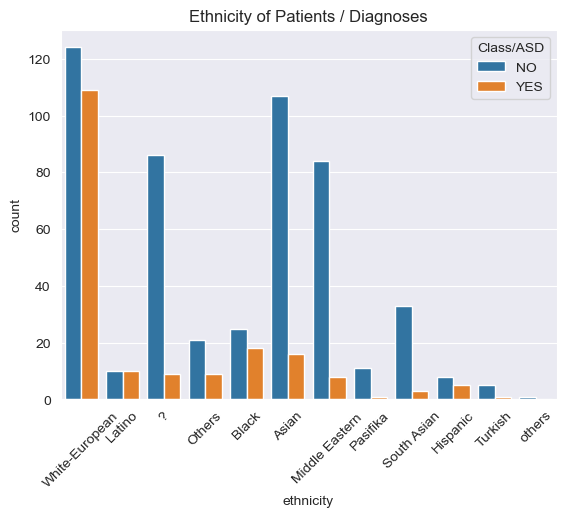

In [9]:
sns.countplot(data=raw_df, x="ethnicity", hue="Class/ASD").set(title="Ethnicity of Patients / Diagnoses")
plt.xticks(rotation=45)
plt.show()

Among White, Latino, and Hispanic demographics, the portion of patients to receive formal diagnoses is much higher. Perhaps this relates to them being higher sampled?

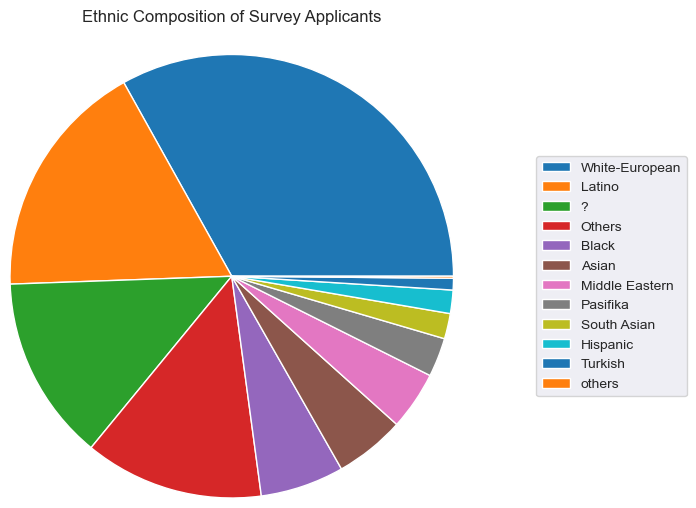

In [10]:
plt.pie(x=raw_df["ethnicity"].value_counts(), radius=1.5)
plt.legend(labels=raw_df["ethnicity"].unique().tolist(), bbox_to_anchor=(1.75, 0.5), loc="right")
plt.title(label="Ethnic Composition of Survey Applicants", pad=50)
plt.show()

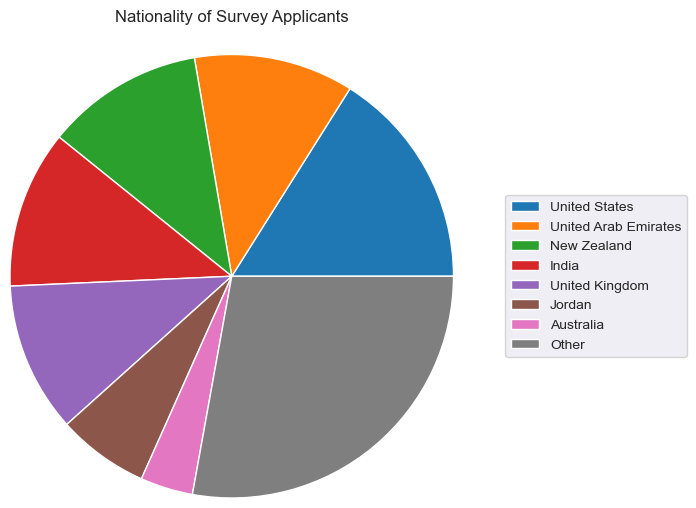

In [11]:
# Collect instance counts, aggregate lower-occurring labels.
nations = raw_df["contry_of_res"].value_counts()[:7]
nations["Other"] = raw_df["contry_of_res"].value_counts()[7:].sum()

plt.pie(x=nations, radius=1.5)
plt.legend(labels=nations.index.tolist(), bbox_to_anchor=(1.75, 0.5), loc="right")
plt.title(label="Nationality of Survey Applicants", pad=50)
plt.show()

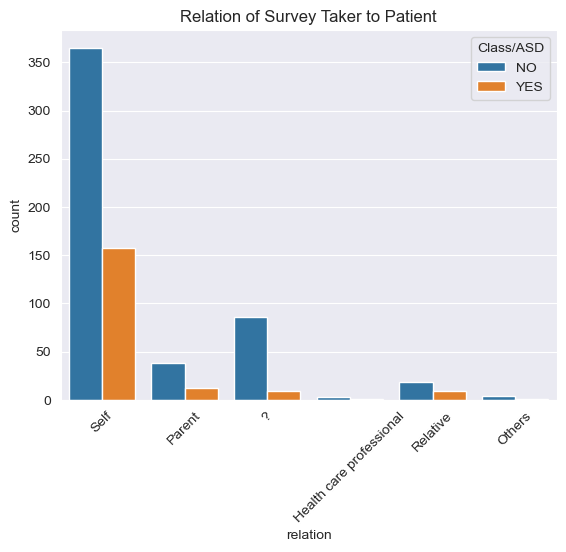

In [12]:
sns.countplot(data=raw_df, x="relation", hue="Class/ASD").set(title="Relation of Survey Taker to Patient")
plt.xticks(rotation=45)
plt.show()

The majority of surveys are self-reported, rather than filled by a parent, relative, or health care professional.

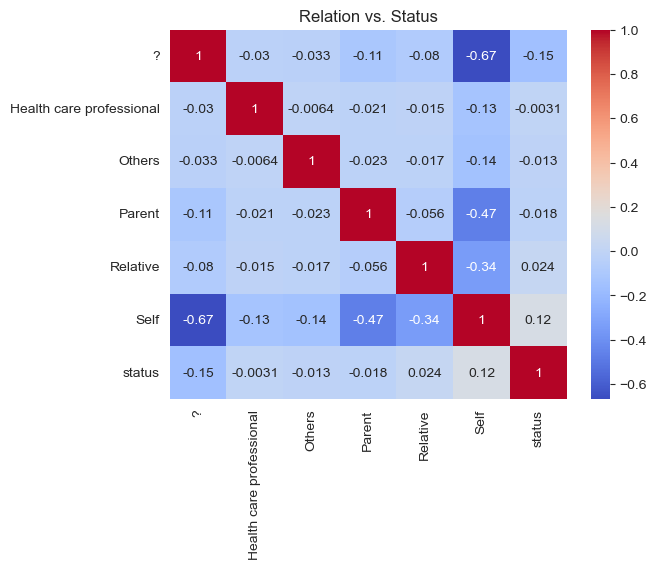

In [13]:
rel_df = pd.get_dummies(raw_df["relation"])
rel_df["status"] = clean_df["status"]

sns.heatmap(data=rel_df.corr(), annot=True, cmap="coolwarm")
plt.title("Relation vs. Status")
plt.show()

So, from the above Heat Map, we can see that the nominal features of ```relation``` have minimal correlation to the target label ```status```. We can strengthen this marginally by grouping non-self relations.

In [14]:
clean_df["self"] = raw_df["relation"].apply(lambda x: 1 if x=="Self" else 0)
clean_df.corr()["self"]["status"]

0.12343697121327522

In [15]:
clean_df.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,sex,jaundice,asd_family,used_app_before,status,self
0,1,1,1,1,0,0,1,1,0,0,26.0,6.0,0,0,0,0,0,1
1,1,1,0,1,0,0,0,1,0,1,24.0,5.0,1,0,1,0,0,1
2,1,1,0,1,1,0,1,1,1,1,27.0,8.0,1,1,1,0,1,0
3,1,1,0,1,0,0,1,1,0,1,35.0,6.0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,1,0,0,40.0,2.0,0,0,0,0,0,0
5,1,1,1,1,1,0,1,1,1,1,36.0,9.0,1,1,0,0,1,1
6,0,1,0,0,0,0,0,1,0,0,17.0,2.0,0,0,0,0,0,1
7,1,1,1,1,0,0,0,0,1,0,64.0,5.0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,1,1,1,29.0,6.0,1,0,0,0,0,1
9,1,1,1,1,0,1,1,1,1,0,17.0,8.0,1,1,1,0,1,0


### C. Data Reduction

In [16]:
countries = pd.get_dummies(raw_df["contry_of_res"])
ethnicities = pd.get_dummies(raw_df["ethnicity"])
mess = pd.concat([countries, ethnicities], axis=1)
mess

,Afghanistan,AmericanSamoa,Angola,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,...,Black,Hispanic,Latino,Middle Eastern,Others,Pasifika,South Asian,Turkish,White-European,others
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
700,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
scaled_mess = mess.copy()
scaled_mess = pd.DataFrame(StandardScaler().fit_transform(scaled_mess), columns=scaled_mess.columns)
pca = PCA(n_components=20)
pca_fit = pca.fit(scaled_mess)

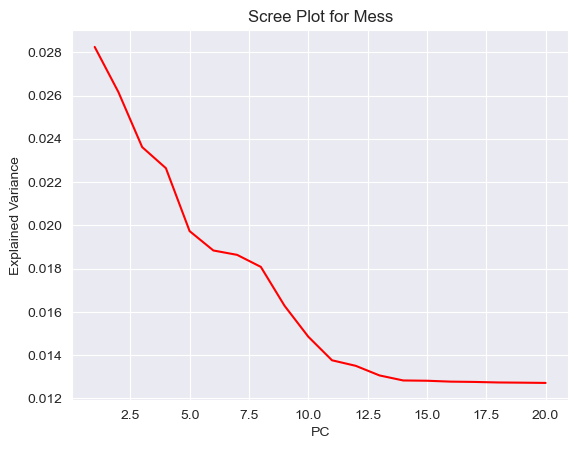

In [18]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, color="red")
plt.title("Scree Plot for Mess")
plt.xlabel("PC")
plt.ylabel("Explained Variance")
plt.show()

In [19]:
np.cumsum(pca.explained_variance_ratio_)[19]

0.3367733971803619

In [20]:
clean_df.corr()["status"].sort_values(ascending=False)

status             1.000000
result             0.821445
A9_Score           0.635576
A6_Score           0.592091
A5_Score           0.537004
A4_Score           0.469945
A3_Score           0.441074
A10_Score          0.385917
A7_Score           0.351429
A2_Score           0.311382
A1_Score           0.297628
A8_Score           0.237161
asd_family         0.177415
self               0.123437
jaundice           0.102152
age                0.059200
used_app_before    0.044038
sex               -0.080378
Name: status, dtype: float64

So, what we're seeing here, is that even 20 PCs crafted from the 80 columns in ```mess``` explains only 33.6% of the variance from ```ethnicity``` and ```contry_of_res```. This suggests to me, that we proceed without these two nominal features at all.

Also, since the total AQ score ```result``` is more highly correlated with diagnostic ```status``` and encapsulates the components score, we'll be dropping ```A1_Score``` to ```A10_Score```.

In [21]:
clean_df = clean_df[["age", "sex", "jaundice", "asd_family", "result", "used_app_before", "self", "status"]].dropna()
clean_df

,age,sex,jaundice,asd_family,result,used_app_before,self,status
0,26.0,0,0,0,6.0,0,1,0
1,24.0,1,0,1,5.0,0,1,0
2,27.0,1,1,1,8.0,0,0,1
3,35.0,0,0,1,6.0,0,1,0
4,40.0,0,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...
699,25.0,0,0,0,7.0,0,1,1
700,34.0,1,0,0,3.0,0,0,0
701,24.0,0,0,0,7.0,0,0,1
702,35.0,1,0,0,6.0,0,1,0


## III. DataViz

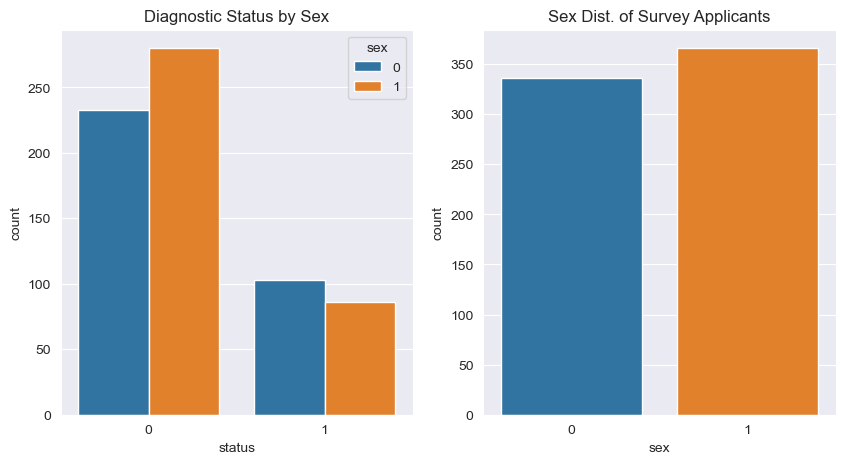

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=clean_df, x="status", hue="sex", ax=ax1)
ax1.set_title("Diagnostic Status by Sex")

sns.countplot(data=clean_df, x="sex", ax=ax2)
ax2.set_title("Sex Dist. of Survey Applicants")

plt.show()

In [23]:
clean_df[clean_df["status"]==1].groupby(by="sex").count()

,age,jaundice,asd_family,result,used_app_before,self,status
sex,,,,,,,
0,103,103,103,103,103,103,103
1,86,86,86,86,86,86,86


Interestingly, it seems that while females constitute a smaller portion of survey applicants, they make up a larger portion of positive diagnoses.

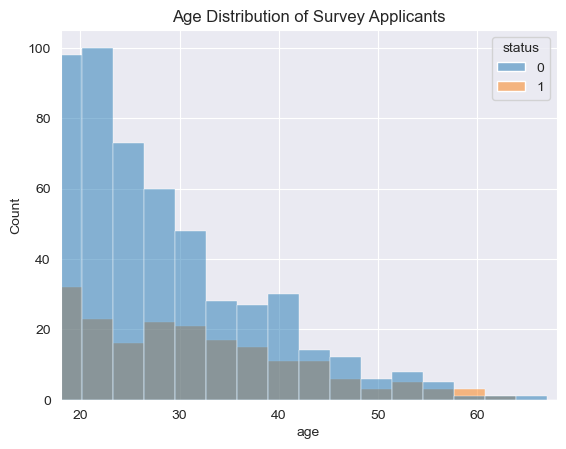

In [24]:
sns.histplot(data=clean_df, x="age", hue="status")
plt.xlim(18, 68)
plt.title("Age Distribution of Survey Applicants")
plt.show()

So, it does look like diagnoses become more likely as time goes on.

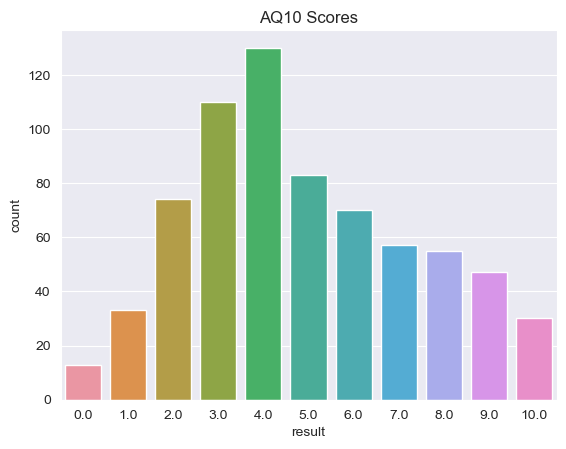

In [25]:
sns.countplot(data=clean_df, x="result")
plt.title("AQ10 Scores")
plt.show()

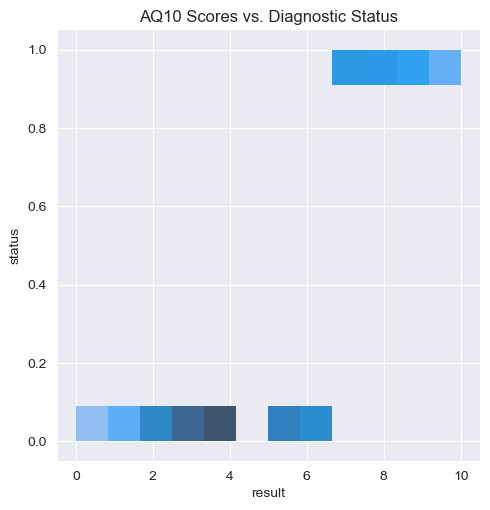

In [26]:
sns.displot(data=clean_df, x="result", y="status")
plt.title("AQ10 Scores vs. Diagnostic Status")
plt.show()

In [27]:
clean_df[clean_df["result"] >= 6]["status"].value_counts()

1    189
0     70
Name: status, dtype: int64

In [28]:
189 / (189 + 70)

0.7297297297297297

So, it looks like the average AQ10 scores is about 4 or 5, with cutoff at 6. Scores greater than or equal to 6 have a roughly 70% probability of resulting in a positive diagnosis.

## IV. Model Building

In [29]:
clean_df.head()

,age,sex,jaundice,asd_family,result,used_app_before,self,status
0,26.0,0,0,0,6.0,0,1,0
1,24.0,1,0,1,5.0,0,1,0
2,27.0,1,1,1,8.0,0,0,1
3,35.0,0,0,1,6.0,0,1,0
4,40.0,0,0,0,2.0,0,0,0


In [30]:
X = clean_df.drop(labels="status", axis=1).values
y = clean_df["status"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [31]:
logr = LogisticRegression().fit(X_train, y_train)
preds = logr.predict(X_test)

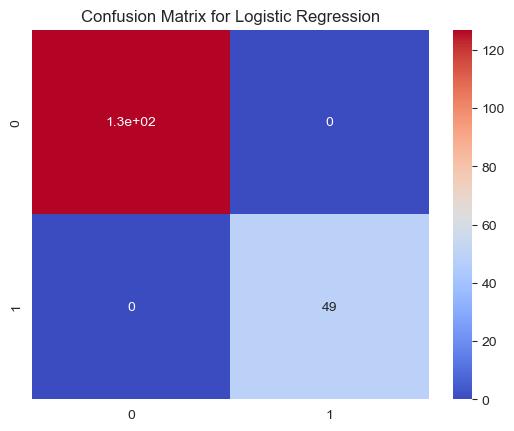

In [32]:
sns.heatmap(data=confusion_matrix(y_test, preds), annot=True, cmap="coolwarm")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [33]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        49

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176



In [34]:
obs = np.array([26, 0.5, 0, 0, 7, 1, 1]).reshape(1, 7)

if int(logr.predict(obs))==1:
    print("Subject is likely on The Spectrum")


Subject is likely on The Spectrum


## VI. Insights and Conclusions

#### Insights
* Among White, Latino, and Hispanic demographics, the portion of patients to receive formal diagnoses is much higher.
* Interestingly, it seems that while females constitute a smaller portion of survey applicants, they make up a larger portion of positive diagnoses.
* The majority of surveys are self-reported, rather than filled by a parent, relative, or health care professional.

#### Conclusion
Use patient age, sex, jaundice at the time of birth, presence of an autistic family member, aq10 score, and information about prior testing, we can predict the diagnostic ```status``` of observations in-sample with 100% accuracy!